# PRIMER CONTACTO CON EL DATASET   "BELGIUM TSC"

Vamos a descargar el dataset de Belgium TSC y aplicaremos una serie de algoritmos para ver su performance.

## INDICE
 + INTRODUCCIÓN
 + UPLOAD THE DATASET
 + EXPLORE THE DATASET
     + VISUALIZACION DE CATEGORIAS
     + ANALISIS DE Nº DE IMAGENES POR CATEGORIA
     + ANALISIS DE CATEGORAIS ESPECIALES

## INTRODUCCIÓN

Los archivos se encuentran en: http://btsd.ethz.ch/shareddata/  
Este dataset contiene 62 clases (62 tipos de señales).  
Descargamos dos archivos:  
+ BelgiumTSC_Training 
+ BelgiumTSC_Testing  

Los archivos deben descomprimirse. Cada archivo está organizado por carpetas con el tipo de clases. Hay 62 carpetas definidas numericamente entre 00000 y 00061.  
Cada carpeta contiene un determinado número de archivos .ppm (imágenes) y un archivo .csv .  

Intentamos seguir los pasos del artículo de Waleed Abdulla en medium: https://medium.com/@waleedka/traffic-sign-recognition-with-tensorflow-629dffc391a6  
El notebook original de jupyter está en github:  
https://github.com/waleedka/traffic-signs-tensorflow

In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import csv

# Allow image embeding in notebook
%matplotlib inline

## 1 UPLOAD DATASET

Vamos a subir el dataset a una Python list.

In [2]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]

    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            #print(f)
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    
    return labels, images

In [3]:
train_data_dir = ".\\data\\Training"            
labels, images = load_data(train_data_dir)

In [6]:
test_data_dir = ".\\data\\Testing"            
Y_test_orig, X_test_orig = load_data(test_data_dir)

## 2 EXPLORANDO EL DATASET

Hemos importado el dataset en una lista de Python de 4575 instancias.  
Cada instancia es un array de 3 dimensiones.  
Las dos primeras dimensiones son el número de pixels en X e Y.  
La tercra dimensión es siempre 3 y se trata del color en RGB.

In [4]:
print("ARRAY DE LABELS TRAIN")
print("Tipo de objeto Python: " , type(labels))
print("Número de imágenes totales: ", len(labels))
print("Número de clases totales: ", len(set(labels)))
print(labels)

ARRAY DE LABELS TRAIN
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  4575
Número de clases totales:  62
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7

In [5]:
X_train_orig = images
print("ARRAY DE IMÁGENES TRAIN")
print("Tipo de objeto Python: ",type(X_train_orig))
print("Número de imágenes totales: ",len(X_train_orig))
print("Dimensiones de la primera imagen: ", X_train_orig[0].shape)
print("Parámetros RGB del primer pixel: ", X_train_orig[0][0][0])
X_train_orig

ARRAY DE IMÁGENES TRAIN
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  4575
Dimensiones de la primera imagen:  (141, 142, 3)
Parámetros RGB del primer pixel:  [210 249 232]


[array([[[210, 249, 232],
         [204, 249, 208],
         [197, 198, 155],
         ...,
         [ 51,  60,  40],
         [ 54,  64,  44],
         [ 57,  66,  46]],
 
        [[209, 250, 236],
         [212, 255, 217],
         [200, 196, 156],
         ...,
         [ 49,  57,  38],
         [ 51,  59,  41],
         [ 53,  60,  42]],
 
        [[203, 246, 236],
         [207, 246, 213],
         [202, 192, 156],
         ...,
         [ 47,  53,  35],
         [ 48,  54,  36],
         [ 48,  55,  37]],
 
        ...,
 
        [[  2,  22,  25],
         [ 26,  56,  77],
         [ 71, 140, 159],
         ...,
         [ 84,  77,  50],
         [ 68,  66,  41],
         [ 56,  64,  44]],
 
        [[  0,  22,  32],
         [ 30,  75, 106],
         [ 87, 176, 198],
         ...,
         [ 86,  80,  52],
         [ 68,  66,  41],
         [ 55,  63,  42]],
 
        [[  0,  32,  50],
         [ 42, 101, 135],
         [121, 217, 239],
         ...,
         [ 87,  80,  52],
  

In [72]:
print("ARRAY DE LABELS TEST")
print("Tipo de objeto Python: " , type(Y_test_orig))
print("Número de imágenes totales: ", len(Y_test_orig))
print("Número de clases totales: ", len(set(Y_test_orig)))
print("HAY 9 CATEGORÍAS SIN REPRESENTAR")
print("Categorías NO representadas: [9, 11, 15, 26, 33, 36, 48, 50, 52] ")
print(set(Y_test_orig))

ARRAY DE LABELS TEST
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  2520
Número de clases totales:  53
HAY 9 CATEGORÍAS SIN REPRESENTAR
Categorías NO representadas: [9, 11, 15, 26, 33, 36, 48, 50, 52] 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61}


In [8]:
print("ARRAY DE IMÁGENES TEST")
print("Tipo de objeto Python: ",type(X_test_orig))
print("Número de imágenes totales: ",len(X_test_orig))
X_test_orig

ARRAY DE IMÁGENES TEST
Tipo de objeto Python:  <class 'list'>
Número de imágenes totales:  2520


[array([[[ 26,  43,  54],
         [ 64,  81,  81],
         [ 60,  68,  57],
         ...,
         [115, 127, 117],
         [112, 125, 115],
         [110, 124, 112]],
 
        [[ 28,  39,  47],
         [ 49,  63,  62],
         [ 50,  62,  51],
         ...,
         [116, 131, 119],
         [109, 124, 113],
         [107, 123, 111]],
 
        [[ 30,  34,  41],
         [ 34,  45,  44],
         [ 41,  56,  45],
         ...,
         [114, 134, 121],
         [105, 124, 111],
         [104, 123, 110]],
 
        ...,
 
        [[ 64,  67,  56],
         [126, 115, 113],
         [199, 178, 184],
         ...,
         [115, 199, 206],
         [136, 224, 224],
         [159, 233, 231]],
 
        [[139, 150, 141],
         [157, 161, 160],
         [160, 159, 166],
         ...,
         [106, 186, 197],
         [130, 205, 212],
         [155, 221, 225]],
 
        [[157, 177, 171],
         [102, 123, 123],
         [ 30,  51,  59],
         ...,
         [106, 182, 196],
  

### 2.1 CATEGORÍAS

In [12]:
f = open('DEFINED.txt','r')
IMAGES_REF_ORIG = [x.rstrip("\n") for x in f]
f.close
#IMAGES_REF_ORIG

<function TextIOWrapper.close>

In [13]:
IMAGES_REF = []
images_ref_dir = ".\data\img" 
for img in IMAGES_REF_ORIG:
    a=img+ ".png"
    IMAGES_REF.append(os.path.join(images_ref_dir, a))
    
#IMAGES_REF

In [51]:
def display_images_ref(images,labels,labels_test):
    unique_labels = set(labels)
    plt.figure(figsize=(14,25))
    i = 1
    #print(unique_labels)
    for label in unique_labels:
        image = images[i-1]
        plt.subplot(13, 5, i)
        plt.axis('off')
        plt.title("Cat.{0}; Pr.({1}), Vl.({2})".format(label, labels.count(label), labels_test.count(label)),fontsize=10)
        i += 1
        _ = plt.imshow(image)
    
    plt.show()

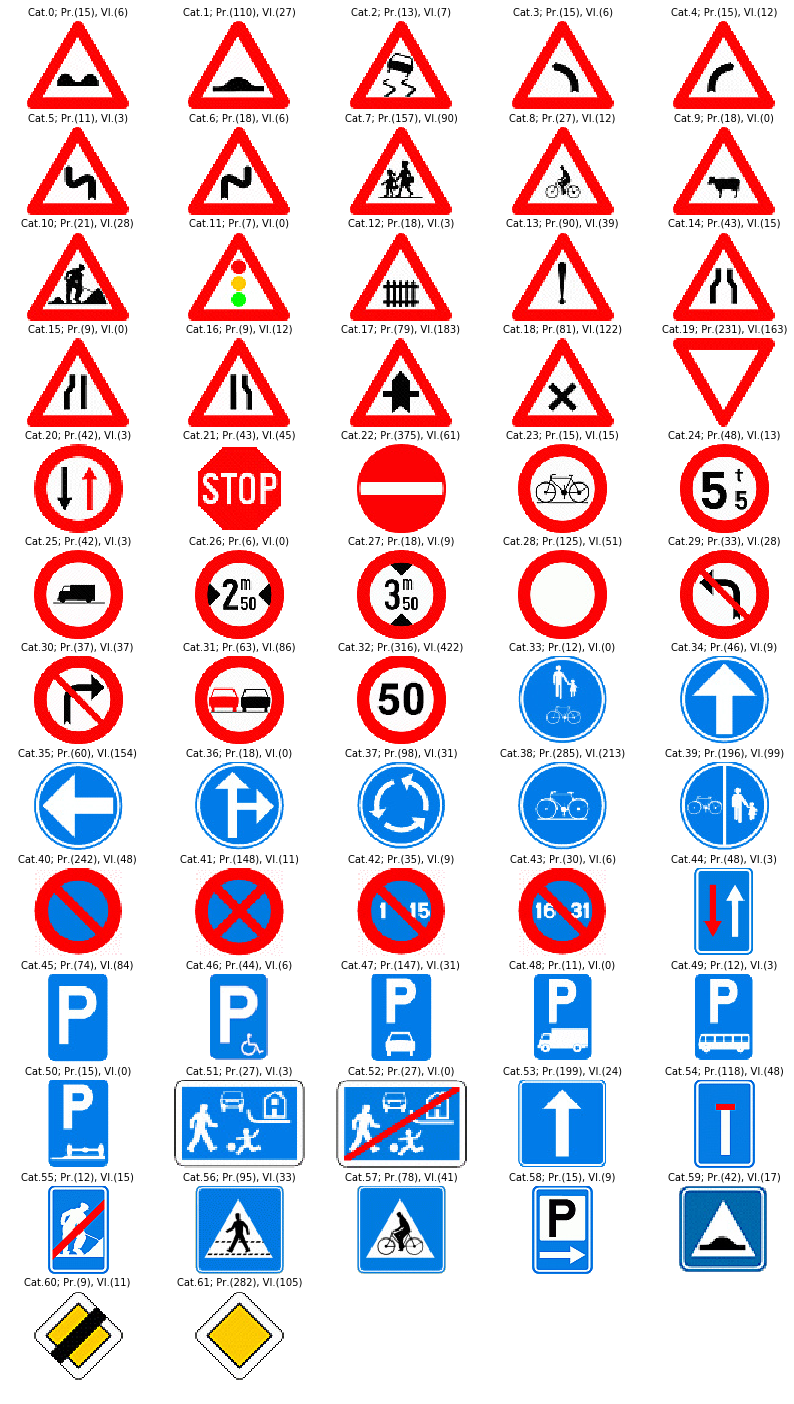

In [52]:
def load_data_img(names):
    i=0
    images = []
    for img in names: 
        #print(img)
        images.append(skimage.data.imread(img))
        #plt.figure()
        #plt.imshow(images[i])
        #i=i+1
    return images

     
images_ref = load_data_img(IMAGES_REF)
#print(IMAGES_REF_ORIG)
display_images_ref(images_ref,labels, Y_test_orig)

In [11]:
def display_images_and_labels(images,labels):
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    
    plt.show()

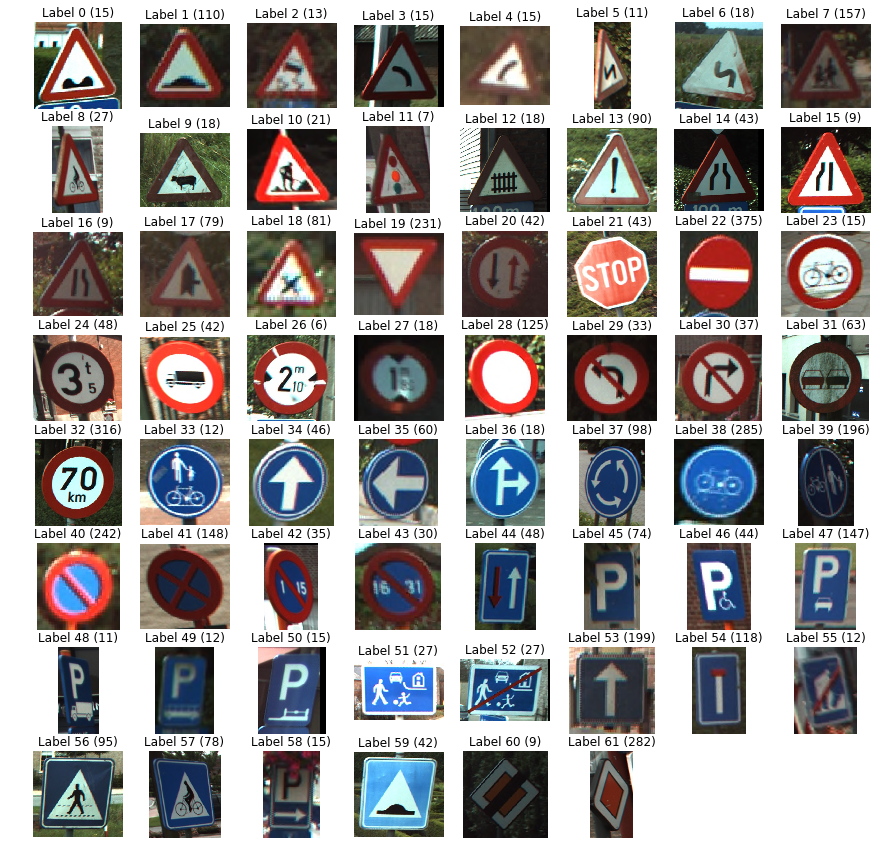

In [12]:
display_images_and_labels(images,labels)

Podemos extraer las siguientes conclusiones:  
+ Tenemos 61 categorias.
+ El número de ejemplos por categoria es muy dispar
+ Las imágenes están muy bien encuadradas
+ No todas las imágenes tienen el mismo tamaño
+ La calidad de alguna de las imágenes deja que desear

A primera vista vemos que el número de imágenes por categoria es muy dispar, pero exactamente cuantas imágenes por categorai hay.  
Vamos a plotear un grafico con el nº de imágnes por categoria.

### 2.2 Nº DE IMÁGNES POR CATEGORIA

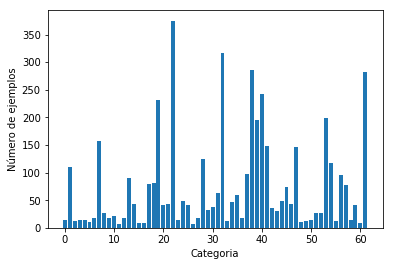

In [13]:
unique_labels = set(labels)
#creamos una lista
labels_count_y=[]
labels_count_x=[]

#con un for recorremos todas las categorias y metemos el número de imágenes
#en cada categoria en la lista labels_count
for i in unique_labels:
    labels_count_y.append(labels.count(i))
    if labels.count(i) != 0:
        labels_count_x.append(i)
    
#ploteamos esta lista como diagrama
#print('labels_count_x',labels_count_x)
#print(len(labels_count_x))
#print('labels_count_y',labels_count_y)
#print(len(labels_count_y))
x=list(range(61))
plt.bar(labels_count_x,labels_count_y)
plt.xlabel('Categoria')
plt.ylabel('Número de ejemplos')
plt.show()

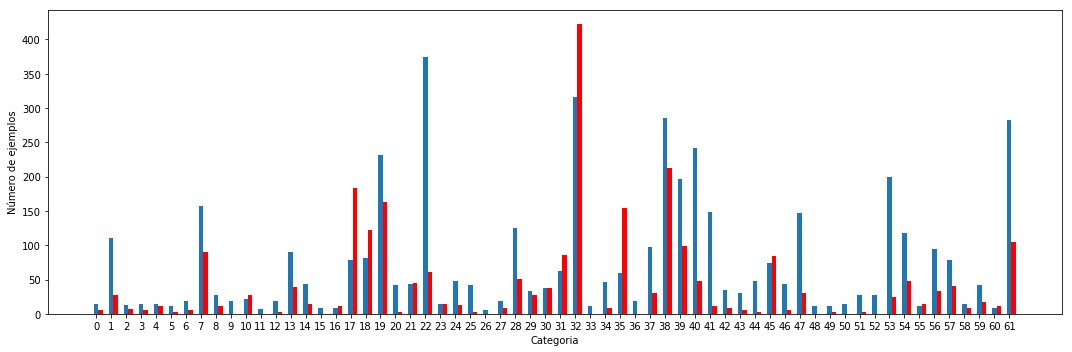

In [70]:
##HISTOGRAMA PRUEBA VS VALIDACIÓN 

plt.figure(figsize=(15, 5))

#SUBCONJUNTO DE PRUEBA
unique_labels = set(labels)
#creamos una lista
labels_count_y=[]
labels_count_x=[]


for i in unique_labels:
    labels_count_y.append(labels.count(i))
    if labels.count(i) != 0:
        labels_count_x.append(i)
    
bar_width = 0.3

x=list(range(61))
plt.bar(labels_count_x,labels_count_y, width=bar_width)


## SUBCONJUNTO VALIDACION
unique_labels = set(Y_test_orig)
#creamos una lista
labels_count_y_1=[]
labels_count_x_1=[]

#con un for recorremos todas las categorias y metemos el número de imágenes
#en cada categoria en la lista labels_count
for i in unique_labels:
    labels_count_y_1.append(Y_test_orig.count(i))
    if labels.count(i) != 0:
        labels_count_x_1.append(i+bar_width)
    
#ploteamos esta lista como diagrama
x=list(range(61))
plt.bar(labels_count_x_1,labels_count_y_1, width=bar_width,color='red')
plt.xlabel('Categoria')
plt.ylabel('Número de ejemplos')
plt.xticks(labels_count_x)
plt.tight_layout()
plt.show()

Efectivamente algunas categorias parece que estan subrepresentadas.

In [53]:
def display_categorias_menores_de_X(cat):
    unique_labels = set(labels)
    #creamos una lista
    labels_count_y=[]
    labels_count_x=[]
    images_count=[]

    #con un for recorremos todas las categorias y metemos el número de imágenes
    #en cada categoria en la lista labels_count
    x=0
    for i in unique_labels:
        if labels.count(i) < cat:
            labels_count_y.append(labels.count(i))
            labels_count_x.append(i)

    #x=list(range(61))
    plt.bar(labels_count_x,labels_count_y)
    plt.xlabel('Categoria')
    plt.ylabel('Número de ejemplos')
    plt.title('CATEGORIAS CON MENOS DE '+str(cat)+' IMAGENES')
    plt.show()

    print('\n CATEGORIAS CON MENOS DE ',str(cat),' IMAGENES: ',labels_count_x)
    print('\n HAY UN TOTAL DE ',len(labels_count_x),'CATEGORIAS CON MENOS DE ',str(cat),'IMAGENES')
    
    plt.figure(figsize=(15, 15))
    i = 1
    for label in labels_count_x:
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    
    plt.show()

Vamos a ver las categorias con menos de 50 imágenes

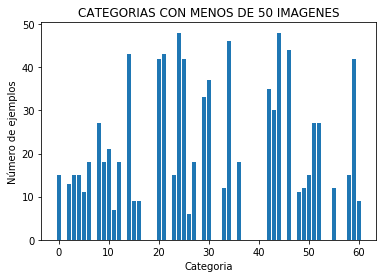


 CATEGORIAS CON MENOS DE  50  IMAGENES:  [0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 20, 21, 23, 24, 25, 26, 27, 29, 30, 33, 34, 36, 42, 43, 44, 46, 48, 49, 50, 51, 52, 55, 58, 59, 60]

 HAY UN TOTAL DE  39 CATEGORIAS CON MENOS DE  50 IMAGENES


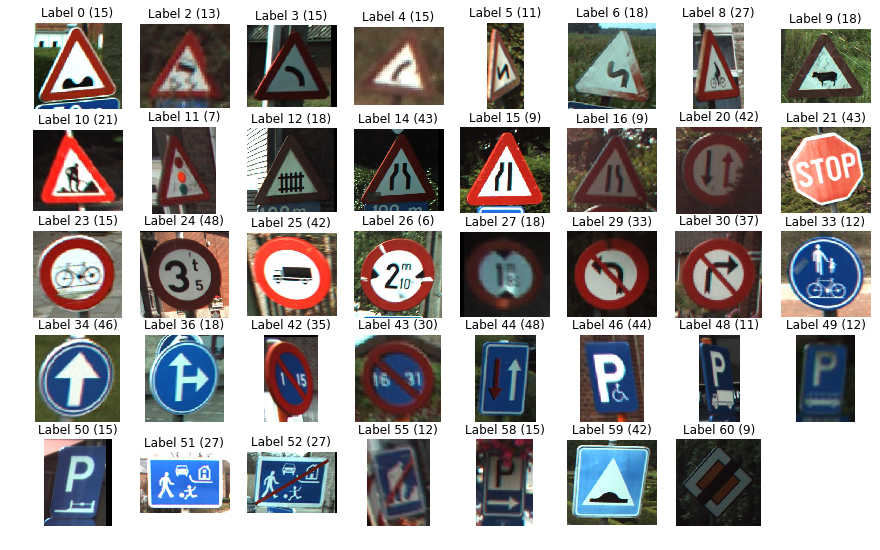

In [15]:
display_categorias_menores_de_X(cat=50)

Categorias con menos de 20 imágenes

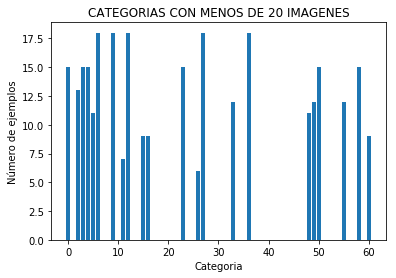


 CATEGORIAS CON MENOS DE  20  IMAGENES:  [0, 2, 3, 4, 5, 6, 9, 11, 12, 15, 16, 23, 26, 27, 33, 36, 48, 49, 50, 55, 58, 60]

 HAY UN TOTAL DE  22 CATEGORIAS CON MENOS DE  20 IMAGENES


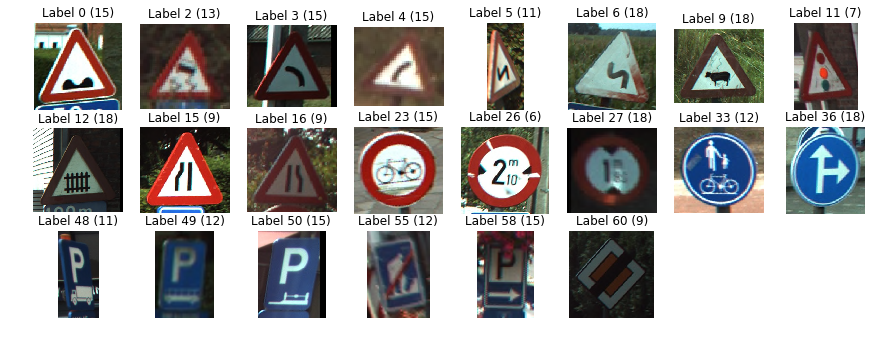

In [16]:
display_categorias_menores_de_X(cat=20)

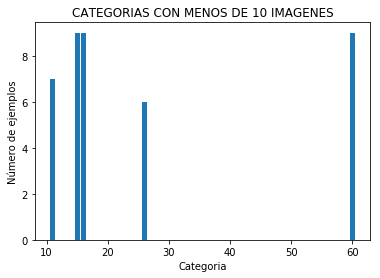


 CATEGORIAS CON MENOS DE  10  IMAGENES:  [11, 15, 16, 26, 60]

 HAY UN TOTAL DE  5 CATEGORIAS CON MENOS DE  10 IMAGENES


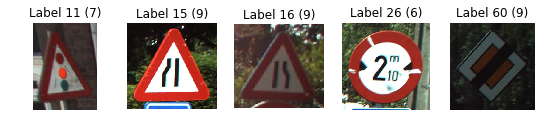

In [17]:
display_categorias_menores_de_X(cat=10)

### 2.3 ANÁLISIS CATEGORIAS ESPECIALES

In [18]:
def display_label_images(images, label, salto):
    #AÑADO UNA PEQUEÑA MODIFICACIÓN AL CÓDIGO DE W.A.
    #CON EL ARGUMENTO SALTO PODEMOS ABARCAR NO SOLO LAS 32 PRIMERAS IMÁGENES
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for c in range(start,end,salto):
        plt.subplot(3, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        image=images[c]
        plt.imshow(image)
    plt.show()

En la categoria 32, tenemos  316 ejemplos.


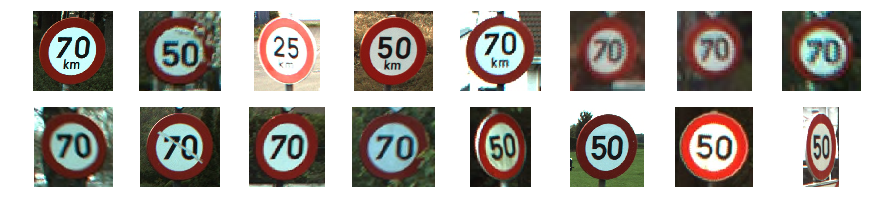

In [19]:
print('En la categoria 32, tenemos ', labels.count(32), 'ejemplos.')
display_label_images(images, label=32, salto=20)

HAY QUE DESTECAR QUE TODAS LAS IMÁGENES CON LÍMITE DE VELOCIDAD SE METEN EN LA MISMA CATEGORIA

En la categoria 23, tenemos  15 ejemplos.


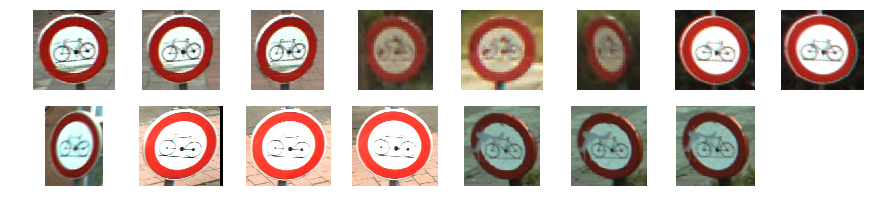

In [20]:
print('En la categoria 23, tenemos ', labels.count(23), 'ejemplos.')
display_label_images(images, label=23, salto=1)

EN ESTA CATEGORIA VEMOS QUE HAY ALGUNAS IMÁGENES MUY BORROSAS

En la categoria 24, tenemos  48 ejemplos.


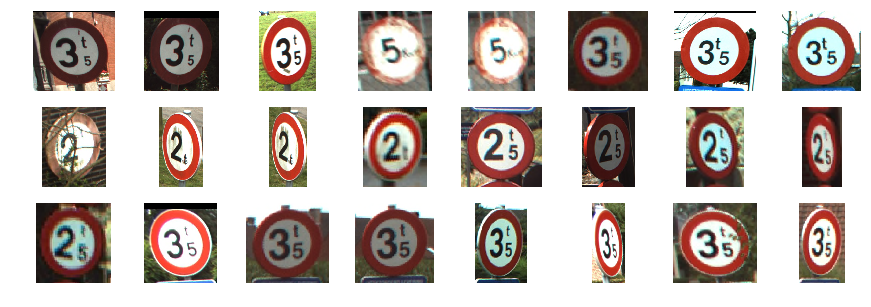

In [21]:
print('En la categoria 24, tenemos ', labels.count(24), 'ejemplos.')
display_label_images(images, label=24, salto=2)

En la categoria 27, tenemos  18 ejemplos.


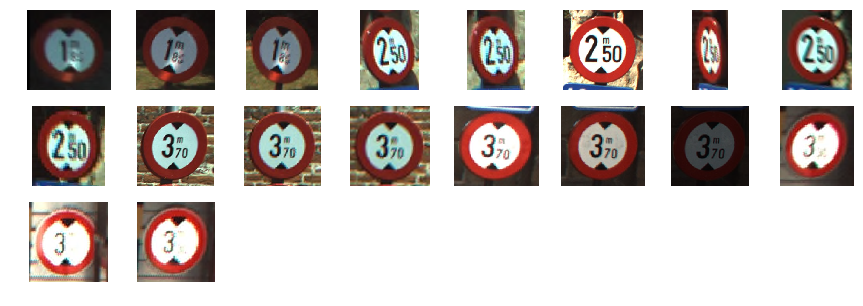

In [22]:
print('En la categoria 27, tenemos ', labels.count(27), 'ejemplos.')
display_label_images(images, label=27, salto=1)

HABRA QUE TENER CUIDADO CON LAS CATEGORIAS 24 Y 27